In [237]:
# Load packages

import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier


In [238]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [239]:
import yfinance as yf

# Define the ticker symbol for Ethereum in USD
ticker = 'ETH-USD'

# Download historical data (daily interval) for the specified period
dataset = yf.download(ticker, start='2021-01-01', end='2024-10-20', interval='1d')

# Show the first few rows of the data
print(dataset.head())

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High         Low  \
Ticker                         ETH-USD      ETH-USD      ETH-USD     ETH-USD   
Date                                                                           
2021-01-01 00:00:00+00:00   730.367554   730.367554   749.201843  719.792236   
2021-01-02 00:00:00+00:00   774.534973   774.534973   786.798462  718.109497   
2021-01-03 00:00:00+00:00   975.507690   975.507690  1006.565002  771.561646   
2021-01-04 00:00:00+00:00  1040.233032  1040.233032  1153.189209  912.305359   
2021-01-05 00:00:00+00:00  1100.006104  1100.006104  1129.371460  986.811279   

Price                             Open       Volume  
Ticker                         ETH-USD      ETH-USD  
Date                                                 
2021-01-01 00:00:00+00:00   737.708374  13652004358  
2021-01-02 00:00:00+00:00   730.402649  19740771179  
2021-01-03 00:00:00+00:00   774.511841  45200463368  
2021-01-04 00:00:00+00:00   977.058

In [240]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)
dataset

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
0,2021-01-01 00:00:00+00:00,730.367554,730.367554,749.201843,719.792236,737.708374,13652004358
1,2021-01-02 00:00:00+00:00,774.534973,774.534973,786.798462,718.109497,730.402649,19740771179
2,2021-01-03 00:00:00+00:00,975.507690,975.507690,1006.565002,771.561646,774.511841,45200463368
3,2021-01-04 00:00:00+00:00,1040.233032,1040.233032,1153.189209,912.305359,977.058838,56945985763
4,2021-01-05 00:00:00+00:00,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,41535932781
...,...,...,...,...,...,...,...
1383,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
1384,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
1385,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321


In [241]:
# Flatten multi-level columns
dataset.columns = ['_'.join(col).strip() for col in dataset.columns.values]


In [242]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)


In [243]:
# Save to CSV
dataset.to_csv('eth_cleaned_data.csv', index=False)


In [244]:
# dataset.drop(columns=['level_0', 'index', 'index_'], inplace=True)

In [245]:
dataset.shape

(1388, 8)

In [246]:
dataset.describe()

,index,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1.388000e+03
mean,693.500000,2357.258498,2357.258498,2418.735090,2287.302460,2356.150781,1.652100e+10
std,400.825398,866.104041,866.104041,891.626699,838.805104,867.706284,1.066940e+10
min,0.000000,730.367554,730.367554,749.201843,718.109497,730.402649,2.081626e+09
25%,346.750000,1660.668304,1660.668304,1692.987244,1629.542450,1660.128937,8.902652e+09
50%,693.500000,2141.445190,2141.445190,2195.717285,2068.025757,2139.935547,1.465121e+10
75%,1040.250000,3022.661499,3022.661499,3123.996277,2943.689880,3022.570374,2.081377e+10
max,1387.000000,4812.087402,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


In [247]:
print(dataset.isnull().sum())

index                0
Date_                0
Adj Close_ETH-USD    0
Close_ETH-USD        0
High_ETH-USD         0
Low_ETH-USD          0
Open_ETH-USD         0
Volume_ETH-USD       0
dtype: int64


In [248]:
dataset

,index,Date_,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
0,0,2021-01-01 00:00:00+00:00,730.367554,730.367554,749.201843,719.792236,737.708374,13652004358
1,1,2021-01-02 00:00:00+00:00,774.534973,774.534973,786.798462,718.109497,730.402649,19740771179
2,2,2021-01-03 00:00:00+00:00,975.507690,975.507690,1006.565002,771.561646,774.511841,45200463368
3,3,2021-01-04 00:00:00+00:00,1040.233032,1040.233032,1153.189209,912.305359,977.058838,56945985763
4,4,2021-01-05 00:00:00+00:00,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,41535932781
...,...,...,...,...,...,...,...,...
1383,1383,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
1384,1384,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
1385,1385,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321
1386,1386,2024-10-18 00:00:00+00:00,2641.552246,2641.552246,2674.371826,2595.958984,2604.814453,17043738652


In [249]:
dataset.columns = dataset.columns.str.replace('_', '', regex=False)
dataset.columns = dataset.columns.str.replace('-', '', regex=False)
dataset.columns = dataset.columns.str.replace('ETHUSD', '', regex=False)

In [250]:
dataset = dataset.dropna(axis=0)

In [251]:
# Make sure Date is the index before plotting
dataset.set_index('Date', inplace=True)

In [252]:
dataset.drop(columns="Adj Close", inplace=True)
dataset.drop(columns="index", inplace=True)

In [253]:
# Printing the start date and End date of the dataset

sd=dataset.index[0]
ed=dataset.index[-1]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2021-01-01 00:00:00+00:00
Ending Date 2024-10-19 00:00:00+00:00


In [254]:
# remove time from the data
dataset.index = pd.to_datetime(dataset.index).date

# Now, the time part is removed from the index
print(dataset.index)

Index([2021-01-01, 2021-01-02, 2021-01-03, 2021-01-04, 2021-01-05, 2021-01-06,
       2021-01-07, 2021-01-08, 2021-01-09, 2021-01-10,
       ...
       2024-10-10, 2024-10-11, 2024-10-12, 2024-10-13, 2024-10-14, 2024-10-15,
       2024-10-16, 2024-10-17, 2024-10-18, 2024-10-19],
      dtype='object', length=1388)


In [255]:
dataset.head()


,Close,High,Low,Open,Volume
2021-01-01,730.367554,749.201843,719.792236,737.708374,13652004358
2021-01-02,774.534973,786.798462,718.109497,730.402649,19740771179
2021-01-03,975.507690,1006.565002,771.561646,774.511841,45200463368
2021-01-04,1040.233032,1153.189209,912.305359,977.058838,56945985763
2021-01-05,1100.006104,1129.371460,986.811279,1041.498779,41535932781


In [256]:
dataset.info

<bound method DataFrame.info of                   Close         High          Low         Open       Volume
2021-01-01   730.367554   749.201843   719.792236   737.708374  13652004358
2021-01-02   774.534973   786.798462   718.109497   730.402649  19740771179
2021-01-03   975.507690  1006.565002   771.561646   774.511841  45200463368
2021-01-04  1040.233032  1153.189209   912.305359   977.058838  56945985763
2021-01-05  1100.006104  1129.371460   986.811279  1041.498779  41535932781
...                 ...          ...          ...          ...          ...
2024-10-15  2606.021973  2685.166748  2537.940918  2629.017578  22003780898
2024-10-16  2611.102051  2644.854248  2589.606934  2606.019531  17012396419
2024-10-17  2604.273438  2646.874023  2577.305908  2611.192139  15150712321
2024-10-18  2641.552246  2674.371826  2595.958984  2604.814453  17043738652
2024-10-19  2648.656982  2661.872803  2631.656982  2641.488281   8557834553

[1388 rows x 5 columns]>

In [257]:
dataset.describe

<bound method NDFrame.describe of                   Close         High          Low         Open       Volume
2021-01-01   730.367554   749.201843   719.792236   737.708374  13652004358
2021-01-02   774.534973   786.798462   718.109497   730.402649  19740771179
2021-01-03   975.507690  1006.565002   771.561646   774.511841  45200463368
2021-01-04  1040.233032  1153.189209   912.305359   977.058838  56945985763
2021-01-05  1100.006104  1129.371460   986.811279  1041.498779  41535932781
...                 ...          ...          ...          ...          ...
2024-10-15  2606.021973  2685.166748  2537.940918  2629.017578  22003780898
2024-10-16  2611.102051  2644.854248  2589.606934  2606.019531  17012396419
2024-10-17  2604.273438  2646.874023  2577.305908  2611.192139  15150712321
2024-10-18  2641.552246  2674.371826  2595.958984  2604.814453  17043738652
2024-10-19  2648.656982  2661.872803  2631.656982  2641.488281   8557834553

[1388 rows x 5 columns]>

# **Preprocessing the data** 

In [258]:
# Buy (1) if tomorrow's price is higher than today's price
dataset['signal'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)


In [259]:
# Check the number of buy (1) and no-buy (0) signals
print(dataset['signal'].value_counts())


signal
1    709
0    679
Name: count, dtype: int64


In [260]:
# Combined rules
#dataset['signal'] = ((dataset['MA10'] > dataset['MA30']) & (dataset['RSI'] < 30)).astype(int)


In [261]:
# making the exponential moving average
# first making the function to calculate the exponential MA of the Close column & then convert into a series

def EMA(df,n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30']= EMA(dataset, 30)
dataset['EMA200'] = EMA (dataset, 200)
dataset.tail()

,Close,High,Low,Open,Volume,signal,EMA10,EMA30,EMA200
2024-10-15,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,1,2501.555549,2494.187525,2806.442758
2024-10-16,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,0,2521.473095,2501.730397,2804.499068
2024-10-17,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,1,2536.527703,2508.346077,2802.506771
2024-10-18,2641.552246,2674.371826,2595.958984,2604.814453,17043738652,1,2555.623074,2516.940024,2800.905232
2024-10-19,2648.656982,2661.872803,2631.656982,2641.488281,8557834553,0,2572.538330,2525.437892,2799.390323


In [262]:
# Compact calculation of Rate of Change
dataset['ROC10'] = dataset['Close'].pct_change(10) * 100
dataset['ROC30'] = dataset['Close'].pct_change(30) * 100

In [263]:
# Compute the momentum

dataset['MOM10'] = dataset['Close'].diff(10)
dataset['MOM30'] = dataset['Close'].diff(30)

In [264]:
# compute the Relative strength index
import talib

dataset['RSI10'] = talib.RSI(dataset['Close'], timeperiod=10)
dataset['RSI30'] = talib.RSI(dataset['Close'], timeperiod=30)
dataset['RSI200'] = talib.RSI(dataset['Close'], timeperiod=200)

In [265]:
#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [266]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)

In [267]:
# Drop rows with NaNs
dataset.dropna(inplace=True)

# Verify no more NaNs
print(dataset.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
signal    0
EMA10     0
EMA30     0
EMA200    0
ROC10     0
ROC30     0
MOM10     0
MOM30     0
RSI10     0
RSI30     0
RSI200    0
%K10      0
%D10      0
%K30      0
%D30      0
%K200     0
%D200     0
MA21      0
MA63      0
MA252     0
dtype: int64


In [268]:
dataset

,Close,High,Low,Open,Volume,signal,EMA10,EMA30,EMA200,ROC10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
2021-07-21,1990.970825,2025.680420,1759.023315,1786.276245,21253359756,1,1934.591093,2077.225655,2243.169086,-6.949405,...,53.099405,60.342053,25.775046,40.704006,22.646504,33.959367,31.155545,1915.285046,2043.667094,2084.486082
2021-07-22,2025.202759,2044.116455,1954.297852,1994.822876,17495480331,1,1951.065942,2073.869335,2240.672365,-0.565532,...,53.178948,94.127379,56.332213,44.670719,32.284406,32.257473,31.853935,1914.133215,2048.675517,2089.734557
2021-07-23,2124.776611,2129.441162,2000.436279,2025.105713,16200392492,1,1982.649700,2077.153679,2239.346817,9.519826,...,53.409947,98.855017,84.441483,59.223747,48.199491,34.905575,33.707471,1932.602478,2053.176860,2095.157275
2021-07-24,2189.218750,2197.649414,2107.323486,2123.961182,16057446601,1,2020.207709,2084.383692,2238.774332,9.772070,...,53.558977,98.227357,97.069918,68.642166,57.512211,36.780295,34.647781,1952.091223,2059.868941,2100.603339
2021-07-25,2191.373779,2194.438232,2108.829834,2187.145508,14566483636,1,2051.328813,2091.286286,2238.233792,14.661034,...,53.563969,98.680477,98.587617,68.957130,65.607681,36.842988,36.176286,1980.111035,2072.474158,2105.524647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,1,2501.555549,2494.187525,2806.442758,7.881587,...,49.658666,77.729666,80.881804,74.271108,66.157097,26.119565,24.040213,2466.937207,2501.511523,3040.255540
2024-10-16,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,0,2521.473095,2501.730397,2804.499068,7.014232,...,49.679681,79.159136,83.155429,74.806814,76.057337,26.394014,26.623038,2484.051636,2512.038802,3035.771328
2024-10-17,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,1,2536.527703,2508.346077,2802.506771,7.534770,...,49.651680,77.237651,78.042151,72.453640,73.843854,26.025101,26.179560,2502.299316,2520.790991,3030.553413
2024-10-18,2641.552246,2674.371826,2595.958984,2604.814453,17043738652,1,2555.623074,2516.940024,2800.905232,8.267401,...,49.806897,87.727434,81.374740,79.254886,75.505113,28.039072,26.819396,2522.470459,2529.851766,3026.236024


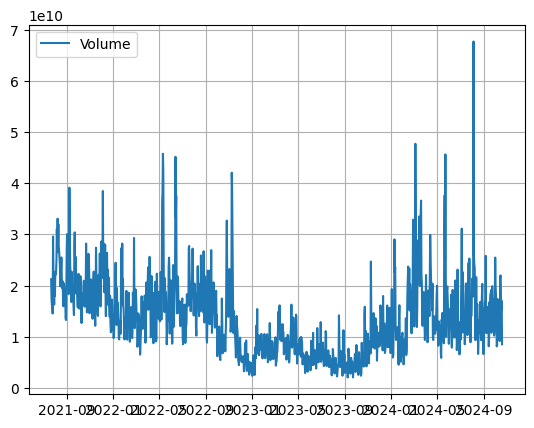

In [269]:
# Plot with Date on the x-axis
dataset[['Volume']].plot(grid=True)
plt.show()

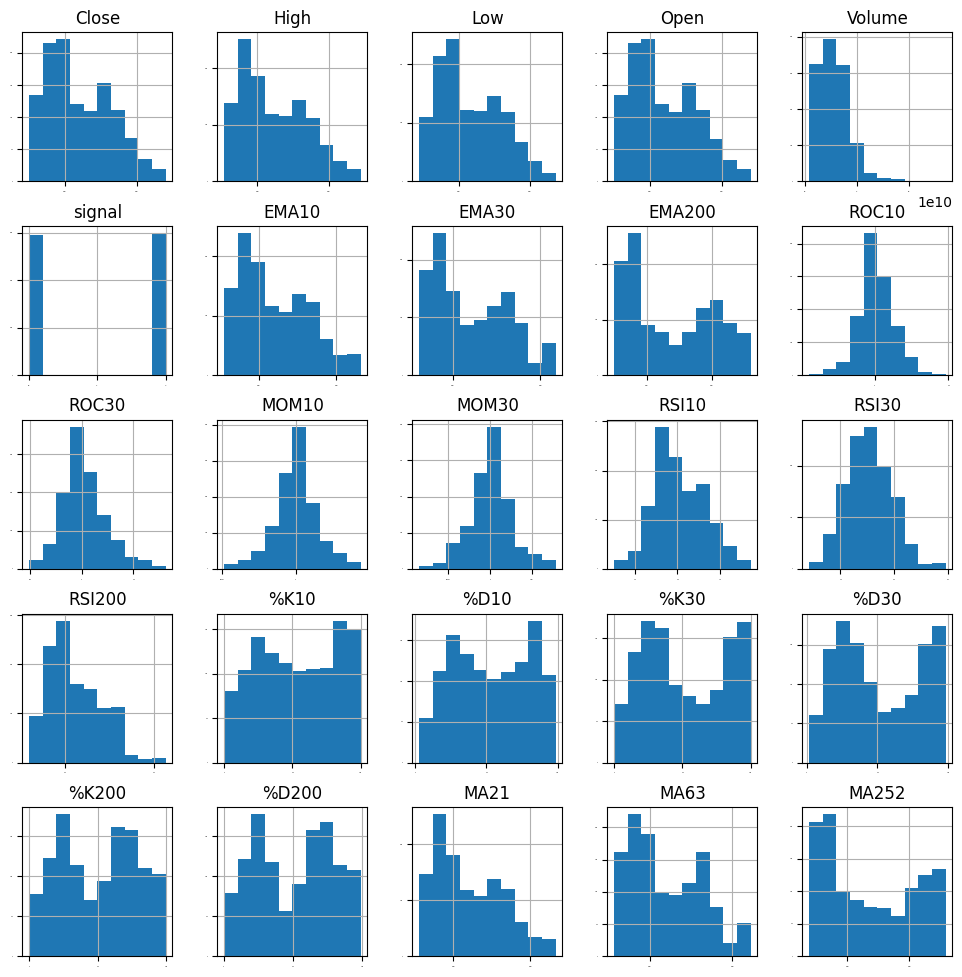

In [270]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

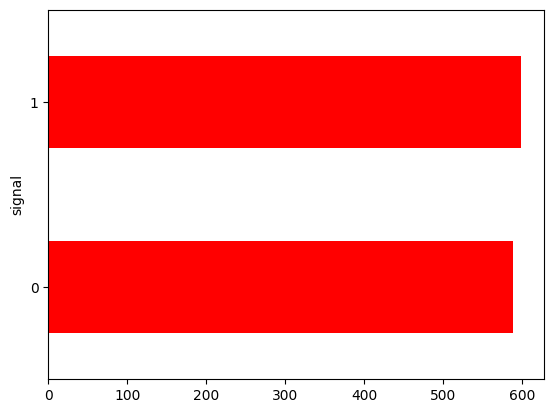

In [271]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

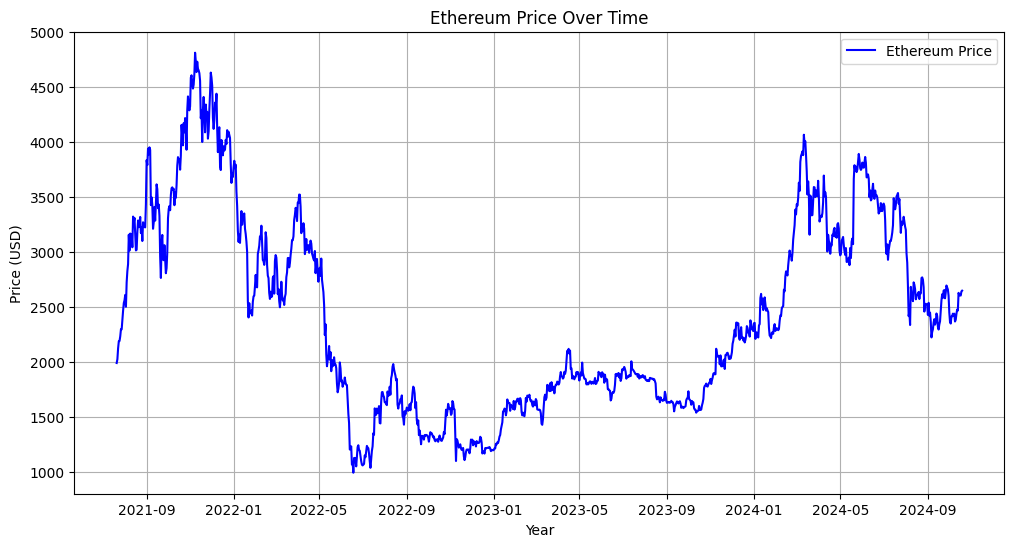

In [272]:
# Select the relevant column for plotting
eth_prices = dataset[['Close']]

import matplotlib.pyplot as plt

# Plot the Ethereum price
plt.figure(figsize=(12, 6))
plt.plot(eth_prices, label='Ethereum Price', color='blue')
plt.title('Ethereum Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


# Models and algorithms

## LSTM model

In [273]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [274]:
# Columns to keep for scaling
columns_to_scale = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'EMA10', 'EMA30', 'EMA200',
    'ROC10', 'ROC30', 'MOM10', 'MOM30',
    'RSI10', 'RSI30', 'RSI200',
    '%K10', '%D10', '%K30', '%D30', '%K200', '%D200',
    'MA21', 'MA63', 'MA252'
]

# Filter the dataset
features_to_scale = dataset[columns_to_scale]


In [275]:
# Scale the features
scaled_features = scaler.fit_transform(features_to_scale)

# Convert back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=columns_to_scale)

# Add the signal column (unchanged)
scaled_data['signal'] = dataset['signal'].values


In [276]:
# Check the first few rows
print(scaled_data.tail())

# Verify the range of the scaled columns
print(scaled_data.describe())


          Open      High       Low     Close    Volume     EMA10     EMA30  \
1182  0.428545  0.422168  0.429582  0.422262  0.303754  0.395661  0.406183   
1183  0.422520  0.411612  0.443100  0.423592  0.227650  0.401339  0.408596   
1184  0.423875  0.412141  0.439882  0.421804  0.199265  0.405631  0.410713   
1185  0.422204  0.419341  0.444762  0.431567  0.228128  0.411075  0.413462   
1186  0.431813  0.416068  0.454102  0.433427  0.098743  0.415897  0.416181   

        EMA200     ROC10     ROC30  ...      %K10      %D10      %K30  \
1182  0.624680  0.566237  0.477790  ...  0.777297  0.815435  0.742711   
1183  0.623747  0.556879  0.488961  ...  0.791591  0.839135  0.748068   
1184  0.622791  0.562495  0.469663  ...  0.772377  0.785835  0.724536   
1185  0.622023  0.570400  0.471618  ...  0.877274  0.820573  0.792549   
1186  0.621296  0.608931  0.441238  ...  0.897266  0.857292  0.809585   

          %D30     %K200     %D200      MA21      MA63     MA252  signal  
1182  0.667679  0

In [277]:
sequence_length = 2

In [278]:
import numpy as np

# Initialize empty lists for sequences and targets
X = []
y = []

# Create sequences
for i in range(sequence_length, len(scaled_data)):
    # Extract sequence of past 30 days (all columns except 'signal')
    X.append(scaled_data.iloc[i-sequence_length:i, :-1].values)
    # Target is the 'signal' for the current day
    y.append(scaled_data.iloc[i, -1])  # 'signal' column

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Check the shapes
print("X shape:", X.shape)  # (number of samples, sequence_length, number of features)
print("y shape:", y.shape)  # (number of samples,)


X shape: (1185, 2, 24)
y shape: (1185,)


In [279]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Check the shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (948, 2, 24) (948,)
Testing data shape: (237, 2, 24) (237,)


In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam


In [281]:
# Initialize the model
model = Sequential()

model.add(BatchNormalization(input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Conv1D(filters=16, kernel_size=2, strides=2,
                           activation="relu"))

#model.add(Conv1D(filters=32, kernel_size=4, strides=2,
#                           activation="relu"))

model.add(Flatten())


model.add(Dense(units=1, activation='sigmoid'))

In [282]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 2, 24)          │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 16)          │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 849 (3.32 KB)

 Non-trainable params: 48 (192.00 B)

In [283]:
history = model.fit(
    X_train, y_train,
    epochs=2000,  # Number of training iterations
    batch_size=32,  # Number of samples per training batch
    validation_data=(X_test, y_test)  # Validation set
)


Epoch 1/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4977 - loss: 0.8052 - val_accuracy: 0.5105 - val_loss: 0.7116
Epoch 2/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5016 - loss: 0.7413 - val_accuracy: 0.5105 - val_loss: 0.6998
Epoch 3/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4892 - loss: 0.7483 - val_accuracy: 0.4979 - val_loss: 0.6934
Epoch 4/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5392 - loss: 0.7240 - val_accuracy: 0.5316 - val_loss: 0.6921
Epoch 5/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4988 - loss: 0.7388 - val_accuracy: 0.5274 - val_loss: 0.6919
Epoch 6/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5028 - loss: 0.7190 - val_accuracy: 0.5401 - val_loss: 0.6915
Epoch 7/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5006 - loss: 0.7198 - val_accuracy: 0.5485 - val_loss: 0.6918
Epoch 8/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5387 - loss: 0.7086 - val_accuracy: 0.

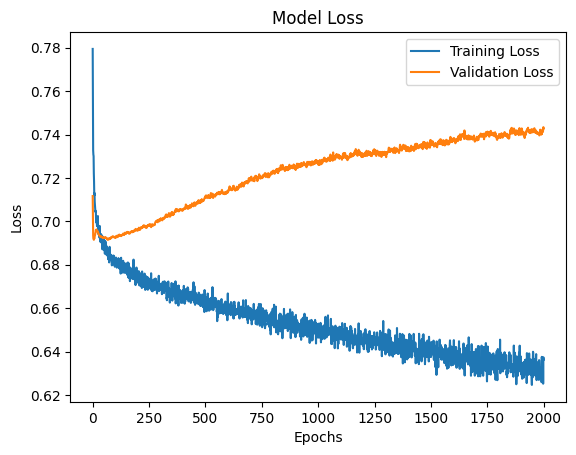

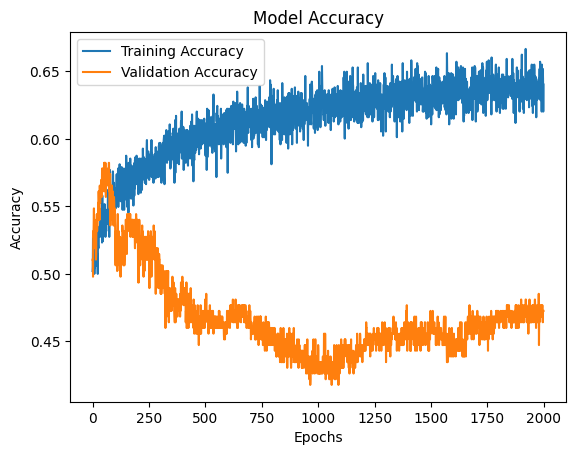

In [284]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparing the predicted results with real ones

In [285]:
# Predict probabilities for the test data
predicted_probs = model.predict(X_test)

# Convert probabilities to binary signals (1 = Buy, 0 = Don't Buy)
predicted_signals = (predicted_probs > 0.5).astype(int).flatten()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [286]:
# Extract the relevant dates and prices for the test set
test_dates = dataset.iloc[-len(y_test):].index
test_prices = dataset.iloc[-len(y_test):]['Close']

# Create a DataFrame to store predictions, actual signals, and prices
results = pd.DataFrame({
    'Date': test_dates,
    'Price': test_prices,
    'Predicted Signal': predicted_signals,
    'Actual Signal': y_test  # Optional: Include actual signals for comparison
})


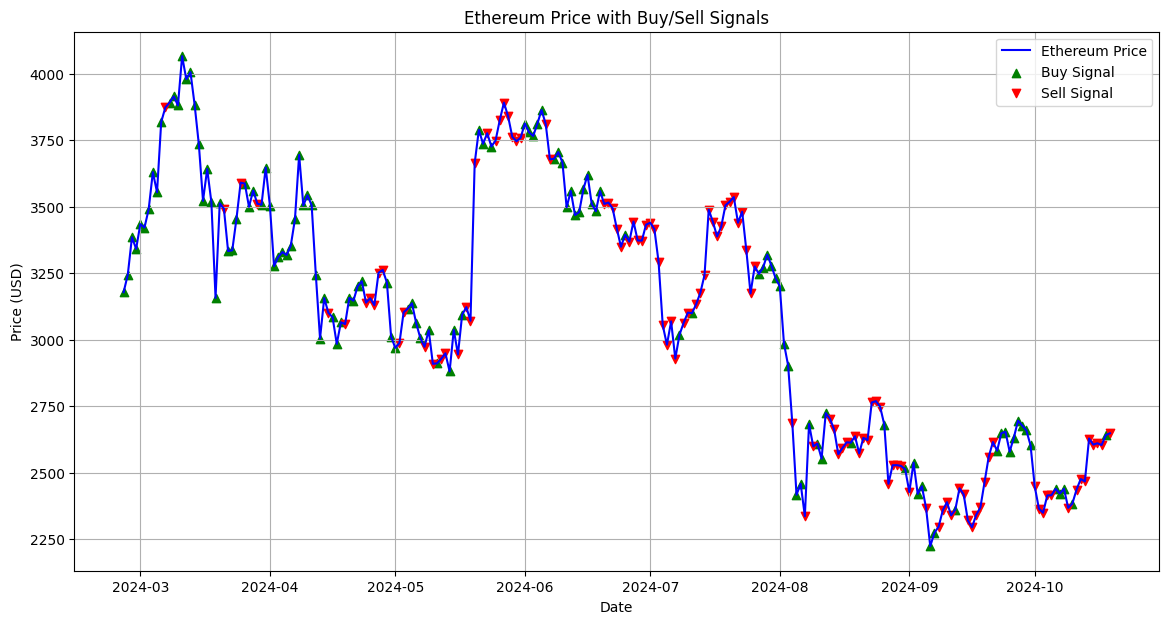

In [287]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Plot buy signals (green dots)
buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(buy_signals['Date'], buy_signals['Price'], color='green', label='Buy Signal', marker='^', alpha=1)

# Plot sell signals (red dots) if needed
sell_signals = results[results['Predicted Signal'] == 0]
plt.scatter(sell_signals['Date'], sell_signals['Price'], color='red', label='Sell Signal', marker='v', alpha=1)

plt.title('Ethereum Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


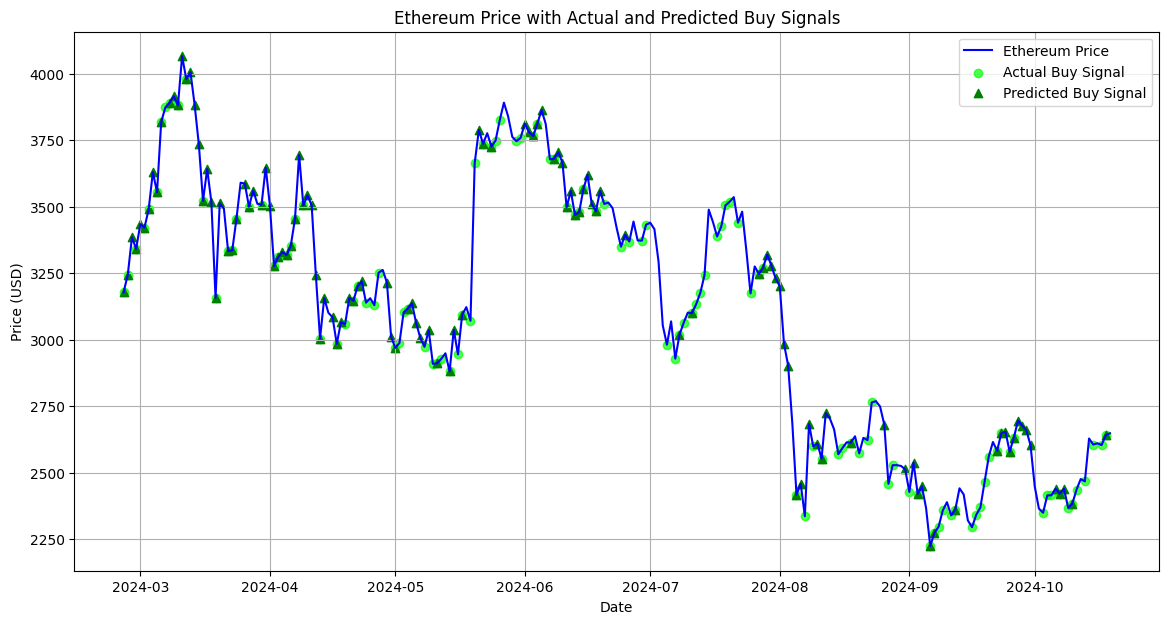

In [288]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Actual buy signals (green dots)
actual_buy_signals = results[results['Actual Signal'] == 1]
plt.scatter(actual_buy_signals['Date'], actual_buy_signals['Price'], color='lime', label='Actual Buy Signal', marker='o', alpha=0.7)

# Predicted buy signals (green triangles)
predicted_buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(predicted_buy_signals['Date'], predicted_buy_signals['Price'], color='green', label='Predicted Buy Signal', marker='^', alpha=1)

plt.title('Ethereum Price with Actual and Predicted Buy Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
